# EDA and Statistical Analysis of Mod Clothing Dataset

# Import libraries & load dataset

In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy import stats as st

Q 1. Read the datasets, Check the data types and Change the data types appropriately.

In [130]:
dataset=pd.read_json('C:/Users/Admin/Documents/EDA_STATS_project/project4/modcloth_final_data.json',lines=True) #reading Dataset

 Let us first make a dummy data frame, which we will use for our illustration

In [131]:
df=dataset.copy()  #dataset copied variable also change

In [132]:
df.info() # to checking the full summary of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82790 entries, 0 to 82789
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   item_id         82790 non-null  int64  
 1   waist           2882 non-null   float64
 2   size            82790 non-null  int64  
 3   quality         82722 non-null  float64
 4   cup size        76535 non-null  object 
 5   hips            56064 non-null  float64
 6   bra size        76772 non-null  float64
 7   category        82790 non-null  object 
 8   bust            11854 non-null  object 
 9   height          81683 non-null  object 
 10  user_name       82790 non-null  object 
 11  length          82755 non-null  object 
 12  fit             82790 non-null  object 
 13  user_id         82790 non-null  int64  
 14  shoe size       27915 non-null  float64
 15  shoe width      18607 non-null  object 
 16  review_summary  76065 non-null  object 
 17  review_text     76065 non-null 

Q 2. Change the height column datatype to float after converting the values as shown Below. 5.7

In [133]:
df.head() 

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN


Now, we have applied astype() method on the ‘user_id’,'item_id' column and have changed the data type to ‘object’.

In [134]:
df['user_id']=df.user_id.astype('object')
df['item_id']=df.item_id.astype('object')

we have changed data type int64 to object

In [135]:
# import re module
import re # regex library

In [136]:
def handle_height(value):
    if type(value)!=type(1.0):
        import regex as re
        l=re.findall('\d',value)  #Matches any decimal digit, this is equivalent to the set class 
        try:
            return (int(l[0])*12+int(l[1]))*2.54
        except:
            return int(l[0])*12*2.54
        

In [137]:
df['height']=df.height.apply(handle_height)

In [138]:
df.head() # the first five entries of the dataset

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,167.64,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,157.48,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,170.18,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,157.48,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN


Q 3. Rename the names of the columns which have space in between the column.Ex: shoe size as shoe_size etc

 Removing the space from column name and replace space with another character (_)

In [139]:
col_name=df.columns # Checking Columns the space 
col_name

Index(['item_id', 'waist', 'size', 'quality', 'cup size', 'hips', 'bra size',
       'category', 'bust', 'height', 'user_name', 'length', 'fit', 'user_id',
       'shoe size', 'shoe width', 'review_summary', 'review_text'],
      dtype='object')

In [140]:
new_col_names=[]   # names without space
for i in col_name:
    x=re.sub('\s','_',i)
    new_col_names.append(x)

In [141]:
d= {col_name[i]:new_col_names[i] for i in range(len(col_name))}

In [142]:
df.rename(columns=d,inplace=True)

In [143]:
df.columns # updated columns name

Index(['item_id', 'waist', 'size', 'quality', 'cup_size', 'hips', 'bra_size',
       'category', 'bust', 'height', 'user_name', 'length', 'fit', 'user_id',
       'shoe_size', 'shoe_width', 'review_summary', 'review_text'],
      dtype='object')

Q.4. Check the missing values and Identify the distribution of the variables to impute the
missing values. Explain based on your analysis decide the features which can be 
dropped and Which can be imputed. And also explain the reason to choose the 
metric that you have chosen to impute the null values.
Note: Kindly copy the datasets and work on the new data frame.

4.1 Check the count and percentage of missing values.


In [144]:
df.isnull().sum()  #Here,checking the count of missing values

item_id               0
waist             79908
size                  0
quality              68
cup_size           6255
hips              26726
bra_size           6018
category              0
bust              70936
height             1107
user_name             0
length               35
fit                   0
user_id               0
shoe_size         54875
shoe_width        64183
review_summary     6725
review_text        6725
dtype: int64

In [145]:
df.isnull().sum()*100/df.shape[0] # missing count of percentage.

item_id            0.000000
waist             96.518903
size               0.000000
quality            0.082136
cup_size           7.555260
hips              32.281677
bra_size           7.268994
category           0.000000
bust              85.681846
height             1.337118
user_name          0.000000
length             0.042276
fit                0.000000
user_id            0.000000
shoe_size         66.282160
shoe_width        77.525063
review_summary     8.122962
review_text        8.122962
dtype: float64

Since the columns waist and bust have more than 85% null values we will drop these columns. For others we will replace the missing values. 

In [146]:
df.drop(columns=['waist','bust'],inplace=True) # Droppong columns from Dataframe

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82790 entries, 0 to 82789
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   item_id         82790 non-null  object 
 1   size            82790 non-null  int64  
 2   quality         82722 non-null  float64
 3   cup_size        76535 non-null  object 
 4   hips            56064 non-null  float64
 5   bra_size        76772 non-null  float64
 6   category        82790 non-null  object 
 7   height          81683 non-null  float64
 8   user_name       82790 non-null  object 
 9   length          82755 non-null  object 
 10  fit             82790 non-null  object 
 11  user_id         82790 non-null  object 
 12  shoe_size       27915 non-null  float64
 13  shoe_width      18607 non-null  object 
 14  review_summary  76065 non-null  object 
 15  review_text     76065 non-null  object 
dtypes: float64(5), int64(1), object(10)
memory usage: 10.1+ MB


    4.2 check the Mean and Median

In [148]:
df.mean() # calculating the mean 

item_id      469325.229170
size             12.661602
quality           3.949058
hips             40.358501
bra_size         35.972125
height          163.975793
user_id      498849.564718
shoe_size         8.145818
dtype: float64

In [149]:
df.median() # calculating the Median 

item_id      454030.0
size             12.0
quality           4.0
hips             39.0
bra_size         36.0
height          165.1
user_id      497913.5
shoe_size         8.0
dtype: float64

4.3 Check the distribution of the variables using Histogram or Dist plot or KDE 
and boxplot etc.

In [150]:
num_col=df.select_dtypes(include=np.number).columns
num_col

Index(['size', 'quality', 'hips', 'bra_size', 'height', 'shoe_size'], dtype='object')

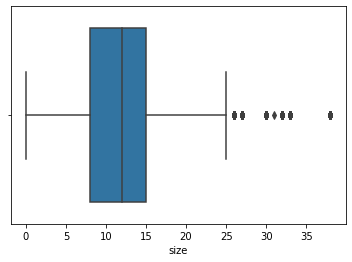

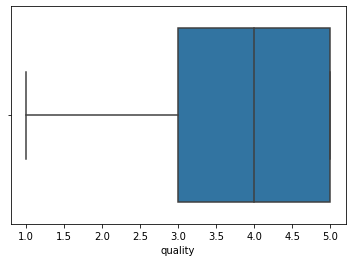

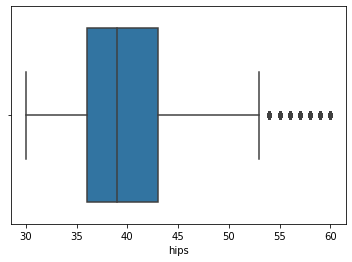

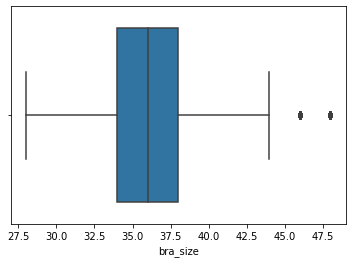

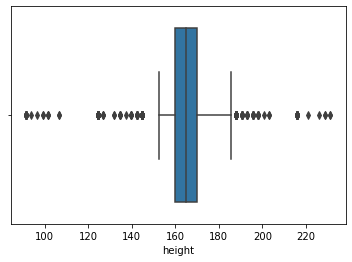

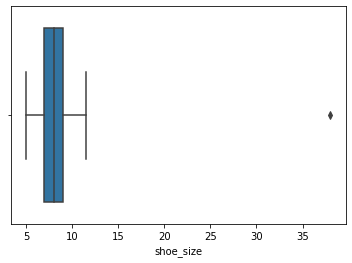

In [151]:
for i in num_col: # checking outliers by plotting boxplot
    sns.boxplot(data=df,x=i)
    plt.show()

We can see that there are outliers in waist,size,quality,hips,bra_size,height and shoe_size

In [152]:
for i in num_col:
    print(df[i].value_counts())

8     17893
12    17343
4     13883
20     7292
15     6883
26     5656
32     3613
1      1784
38     1461
10     1164
5       851
7       777
6       775
9       737
11      542
13      486
14      364
18      251
17      235
21      201
3       142
24      125
27       94
2        94
30       65
33       46
0        31
31        1
25        1
Name: size, dtype: int64
5.0    29604
4.0    27118
3.0    19526
2.0     5130
1.0     1344
Name: quality, dtype: int64
35.0    6090
40.0    5452
38.0    4961
36.0    4829
42.0    3637
39.0    3263
37.0    3162
41.0    3146
44.0    2570
34.0    2455
43.0    1840
45.0    1769
46.0    1456
50.0    1370
33.0    1232
48.0    1231
47.0    1057
32.0    1045
52.0     840
30.0     757
49.0     678
60.0     494
55.0     483
51.0     481
53.0     424
54.0     379
31.0     340
56.0     224
58.0     179
57.0     135
59.0      85
Name: hips, dtype: int64
34.0    22412
36.0    19624
38.0    11923
32.0    10026
40.0     5115
42.0     3373
44.0     2014
30.0    

Here we can say that only height is the continuous variable. All others are dicrete values.

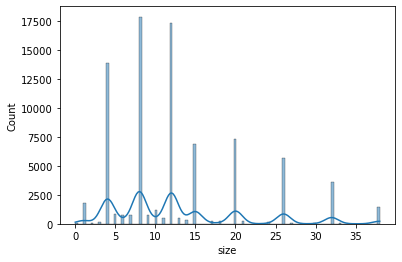

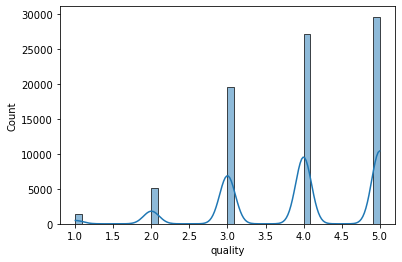

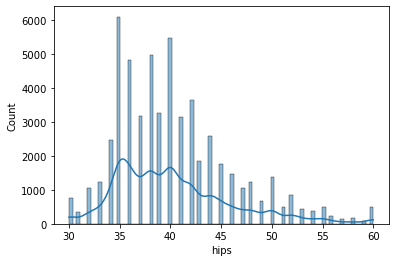

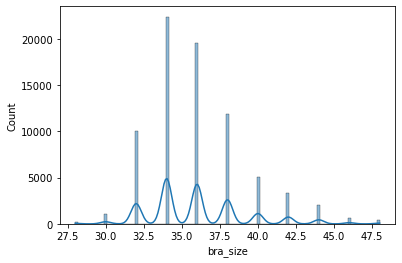

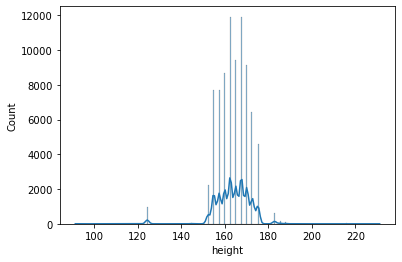

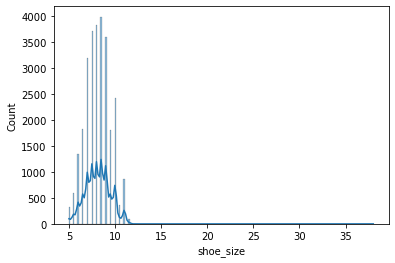

In [153]:
for i in num_col:
    sns.histplot(df[i],kde=True)
    plt.show()

None of the above follows normal distributuion

4.4 Check the Skewness and Kurtosis.
Explain what the Skewness and Kurtosis describe.

In [154]:
for i in num_col:
    print('skewness and kurtosis for', i) ## Measures of Distribution shape-  Skewness and Kurtosis
    print(df[i].skew(),' ',df[i].kurt(),'\n')
    

skewness and kurtosis for size
1.1283012975160551   0.7600101174224343 

skewness and kurtosis for quality
-0.6767774975693622   -0.16708476405420614 

skewness and kurtosis for hips
0.9691874732078445   0.848463938836018 

skewness and kurtosis for bra_size
0.9010040022340067   1.039444812091447 

skewness and kurtosis for height
-1.3403881712439256   8.29250259387626 

skewness and kurtosis for shoe_size
0.43671348402307403   8.448819740218822 



'Size','hips','bra_size'and'shoe_size'columns are signifies the positive skew ,the tail is on the right side of the distribution, which extends towards more positive values.
and
"quality"and 'height' columns are signifies the negative skew,the tail is on the left side of the distribution, which extends towards more negative values.


4.5 Based on the above approach impute the missing values with the right 
metric. Or If you want to get some analysis before imputing missing values 
feel free to explore the analysis.


In [155]:
df.quality.value_counts() #count occurrences of unique values 

5.0    29604
4.0    27118
3.0    19526
2.0     5130
1.0     1344
Name: quality, dtype: int64

In [156]:
df.quality.isna().sum() # to detect the missing values from the column

68

Since there null values we have to treat them.


In [157]:
df.quality.mode() # finding the mode of the column 

0    5.0
Name: quality, dtype: float64

Here to treat the outliers we replace the missing values by rating 4. Even though the mode is rating 5 but that is the highest rating and also the frequency for rating 4 is comparable to that of 5. Hence we shall go with 4 for replacing missing values


In [158]:
df.quality.fillna(4,inplace=True)#replacement of null values in quality.

<AxesSubplot:xlabel='quality', ylabel='count'>

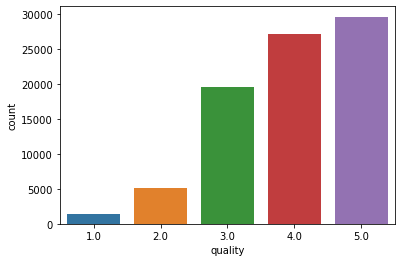

In [159]:
sns.countplot(data=df,x='quality') # count plot on quality column which is categorical variable 

In [160]:
df.quality.mean() #mean of Quality

3.9491001328662882

In [161]:
df.hips.value_counts() # count values in hips column

35.0    6090
40.0    5452
38.0    4961
36.0    4829
42.0    3637
39.0    3263
37.0    3162
41.0    3146
44.0    2570
34.0    2455
43.0    1840
45.0    1769
46.0    1456
50.0    1370
33.0    1232
48.0    1231
47.0    1057
32.0    1045
52.0     840
30.0     757
49.0     678
60.0     494
55.0     483
51.0     481
53.0     424
54.0     379
31.0     340
56.0     224
58.0     179
57.0     135
59.0      85
Name: hips, dtype: int64

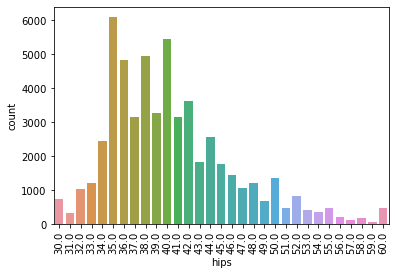

In [162]:
# count plot
sns.countplot(data=df,x='hips') #count plot on Hips which is categorical variable
plt.xticks(rotation=90)
# Show the plot
plt.show()

<AxesSubplot:xlabel='hips', ylabel='height'>

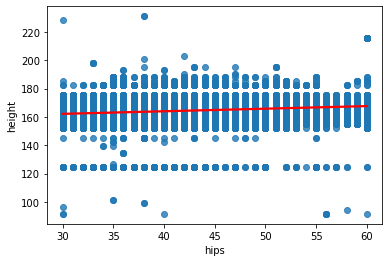

In [163]:
sns.regplot(data=df,x='hips',y='height',line_kws={'color': 'red'}) # drawing regplot for 'hips'and 'height' columns

We can say that increase in hips do not affect height.

<AxesSubplot:xlabel='bra_size', ylabel='hips'>

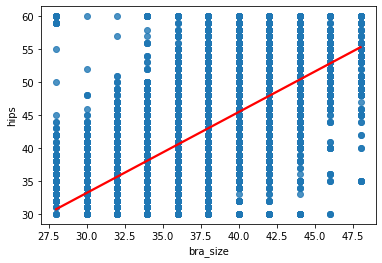

In [164]:
sns.regplot(data=df,x='bra_size',y='hips',line_kws={'color': 'red'}) #Drawing regplot for 'bra-size and 'hips'columns

Here we can say that hips increases gradually with an increase in bra size

From above two plots even if there is a relation, still we can see that every hips size exists for every height and bra size and hence we will replace the missing values with mode.

Hence replacing the missing values with 35 which is mode for hips.


In [165]:
df['hips'].fillna(35,inplace=True)

In [166]:
df['bra_size'].value_counts() #count plot on 'bra_size' which is categorical variable

34.0    22412
36.0    19624
38.0    11923
32.0    10026
40.0     5115
42.0     3373
44.0     2014
30.0     1052
46.0      596
48.0      379
28.0      258
Name: bra_size, dtype: int64

 similarly here also we will replace the missing values with mode

In [167]:
df.bra_size.fillna(34,inplace=True) 

<AxesSubplot:xlabel='height'>

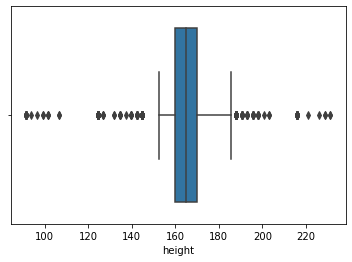

In [168]:
sns.boxplot(df['height']) 

In [169]:
a=df['height'].dropna()
Q3=np.quantile(a,0.75)
Q1=np.quantile(a,0.25)
IQR=st.iqr(a) #IQR=Q3-Q1
ul=1.5*IQR+Q3
ll=Q1-1.5*IQR

In [170]:
ul

185.42000000000002

In [171]:
ll

144.78000000000003

we can see that there are outliers

In [172]:
df.height.median() # calculating median for height column

165.1

In [173]:
df.height.mean() #calculating mean for height column

163.97579275980402

Since the value is continuos with outlier we will replace the missing values with median.

In [174]:
df.height.fillna(df.height.median(),inplace=True) #replacing null values with the median

In [175]:
df.shoe_size.value_counts().sort_index() ## finding the count of unique values and sorting by ascending

5.0      316
5.5      589
6.0     1338
6.5     1829
7.0     3193
7.5     3704
8.0     3832
8.5     3982
9.0     3599
9.5     1806
10.0    2419
10.5     356
11.0     860
11.5      91
38.0       1
Name: shoe_size, dtype: int64

<AxesSubplot:xlabel='height', ylabel='shoe_size'>

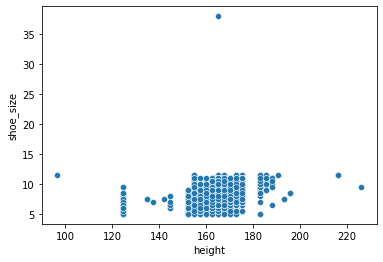

In [176]:
sns.scatterplot(data=df,x='height',y='shoe_size')

#Draw Seaborn Scatter Plot to find relationship between height and shoe_size

From here the value 38 seems impossible hence we will replace that too


In [177]:
df[df['shoe_size']==38] #replacing shoe_size

,item_id,size,quality,cup_size,hips,bra_size,category,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
37313,416942,12,5.0,d,46.0,36.0,new,165.1,Catslittle,just right,fit,237498,38.0,average,Cardigans are best item Mod Cloth has,"I love these cardigans, my favorite, good fabr..."


In [178]:
df[df['shoe_size']==6].head()

,item_id,size,quality,cup_size,hips,bra_size,category,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
49,123373,11,5.0,c,37.0,36.0,new,157.48,Janine,slightly long,small,117413,6.0,average,NaN,NaN
267,124761,5,2.0,c,35.0,32.0,new,154.94,megan.e.dunham,slightly long,fit,29080,6.0,average,NaN,NaN
370,125442,7,5.0,d,38.0,34.0,new,152.40,Kayla,just right,small,159581,6.0,average,NaN,NaN
371,125442,5,4.0,a,35.0,32.0,new,152.40,callielynn7,just right,large,847136,6.0,NaN,NaN,NaN
439,125442,7,5.0,b,38.0,36.0,new,152.40,Linda,just right,fit,76737,6.0,NaN,NaN,NaN


Here we can say that the size 38 may be the EURO SIZE , hence if we convert it to US size then it should be 6

In [179]:
df.shoe_size.replace(38,6,inplace=True)

In [180]:
df.shoe_size.value_counts()

8.5     3982
8.0     3832
7.5     3704
9.0     3599
7.0     3193
10.0    2419
6.5     1829
9.5     1806
6.0     1339
11.0     860
5.5      589
10.5     356
5.0      316
11.5      91
Name: shoe_size, dtype: int64

<AxesSubplot:xlabel='height', ylabel='shoe_size'>

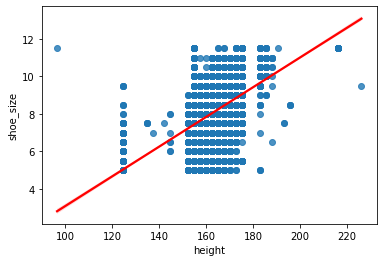

In [181]:
sns.regplot(data=df,x='height',y='shoe_size',line_kws={'color':'red'})

Here we can see that as height increases shoe size also increases. 

In [182]:
df.shoe_size.fillna(8.5,inplace=True)

In [183]:
df.isnull().sum()*100/df.shape[0]

item_id            0.000000
size               0.000000
quality            0.000000
cup_size           7.555260
hips               0.000000
bra_size           0.000000
category           0.000000
height             0.000000
user_name          0.000000
length             0.042276
fit                0.000000
user_id            0.000000
shoe_size          0.000000
shoe_width        77.525063
review_summary     8.122962
review_text        8.122962
dtype: float64

Now we have dealt with all the numerical columns and will now treat the categorical columns.

In [184]:
df.cup_size.value_counts()

c         18370
d         16149
b         14628
dd/e      12557
ddd/f      6117
a          4791
dddd/g     2008
h          1042
aa          296
j           200
i           189
k           188
Name: cup_size, dtype: int64

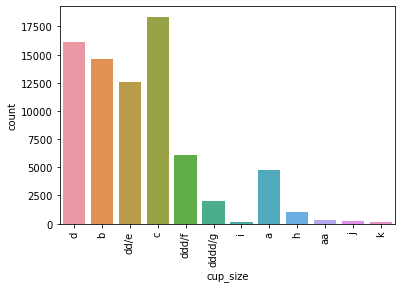

In [185]:
sns.countplot(data=df,x='cup_size')
plt.xticks(rotation=90)
plt.show()

In [186]:
#for categorical data we will replace the missing values with mode

In [187]:
df.cup_size.fillna('c',inplace=True)

In [188]:
df.cup_size.value_counts()

c         24625
d         16149
b         14628
dd/e      12557
ddd/f      6117
a          4791
dddd/g     2008
h          1042
aa          296
j           200
i           189
k           188
Name: cup_size, dtype: int64

In [189]:
df.isnull().sum()*100/df.shape[0] #after replacing null values checking again for remaining columns.

item_id            0.000000
size               0.000000
quality            0.000000
cup_size           0.000000
hips               0.000000
bra_size           0.000000
category           0.000000
height             0.000000
user_name          0.000000
length             0.042276
fit                0.000000
user_id            0.000000
shoe_size          0.000000
shoe_width        77.525063
review_summary     8.122962
review_text        8.122962
dtype: float64

In [190]:
df.length.value_counts()

just right        61944
slightly long     11261
slightly short     6319
very long          2428
very short          803
Name: length, dtype: int64

In [191]:
df.length.fillna('just right',inplace=True) # replacing Null values

In [192]:
df.length.value_counts()

just right        61979
slightly long     11261
slightly short     6319
very long          2428
very short          803
Name: length, dtype: int64

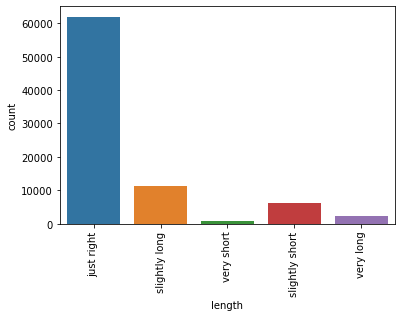

In [193]:
sns.countplot(data=df,x='length') #count plot
plt.xticks(rotation=90)
plt.show()

In [194]:
df.shoe_width.value_counts()

average    13097
wide        3958
narrow      1552
Name: shoe_width, dtype: int64

In [195]:
df.shoe_width.fillna('average',inplace=True)

Here we are not replacing the null values of review_text and review summary.. as it does not make any sense , later we may make a separate category for the missing values if required. 

# Q5

Q5. Find the outliers which are below and above 2.5 * IQR - Q1 and 2.5 * IQR + Q3.

In [196]:
IQR=st.iqr(df['height'],) # the range between the first and the third quartiles
Q1=np.quantile(df['height'],0.25) #median of the dataset.
Q3=np.quantile(df['height'],0.75) # median of n highest data points.

In [197]:
ll= Q1 -2.5 * IQR #
ul=2.5 * IQR + Q3 #

In [198]:
ll #lower level

134.62

In [199]:
ul #upper level

195.57999999999998

<AxesSubplot:xlabel='height'>

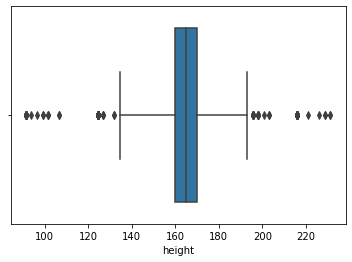

In [200]:
sns.boxplot(data=df, x='height',whis=2.5) #Creating box plot for the height

In [201]:
df[(df['height']<ul)&(df['height']>ll)] 

,item_id,size,quality,cup_size,hips,bra_size,category,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
0,123373,7,5.0,d,38.0,34.0,new,167.64,Emily,just right,small,991571,8.5,average,NaN,NaN
1,123373,13,3.0,b,30.0,36.0,new,157.48,sydneybraden2001,just right,small,587883,8.5,average,NaN,NaN
2,123373,7,2.0,b,35.0,32.0,new,170.18,Ugggh,slightly long,small,395665,9.0,average,NaN,NaN
3,123373,21,5.0,dd/e,35.0,34.0,new,165.10,alexmeyer626,just right,fit,875643,8.5,average,NaN,NaN
4,123373,18,5.0,b,35.0,36.0,new,157.48,dberrones1,slightly long,small,944840,8.5,average,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82785,807722,8,4.0,b,35.0,36.0,outerwear,172.72,Jennifer,just right,fit,727820,8.5,average,Cute jacket!,Cute jacket!
82786,807722,12,5.0,ddd/f,35.0,34.0,outerwear,165.10,Kelli,slightly long,small,197040,8.5,average,It's a beautiful jacket.,It's a beautiful jacket. I love how it's knit ...
82787,807722,12,5.0,dddd/g,36.0,32.0,outerwear,162.56,elacount,just right,fit,102493,8.5,average,I love this blazer. It is,I love this blazer. It is a great office piece...
82788,807722,12,4.0,c,35.0,34.0,outerwear,160.02,jennaklinner,just right,fit,756491,8.5,average,I love this blazer!! I wo,I love this blazer!! I wore it yesterday and g...


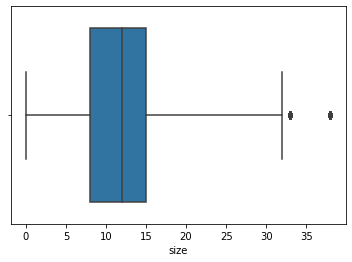

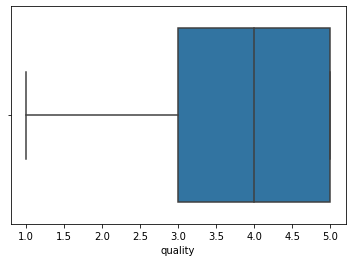

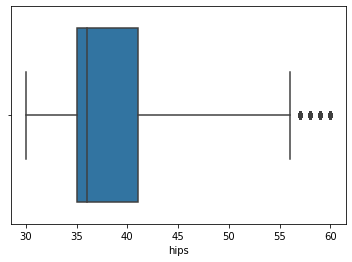

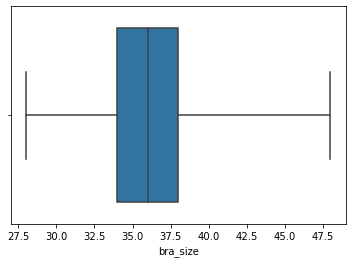

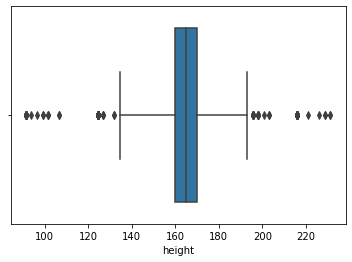

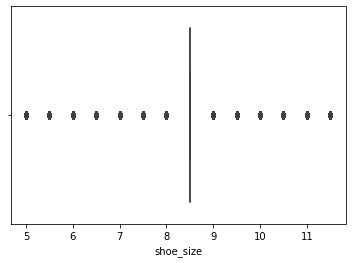

In [203]:
for i in num_col:
    sns.boxplot(data=df,x=i,whis=2.5)
    plt.show()
   

From above we understand that we will be treating outliers of size, height,and hips. 
 
Note==> here shoe_size outliers are very important.. hence we will not treat them.

In [204]:
IQR=st.iqr(df['size'],)
Q1=np.quantile(df['size'],0.25)
Q3=np.quantile(df['size'],0.75)
ll= Q1 -2.5 * IQR 
ul=2.5 * IQR + Q3
df=df[(df['shoe_size']<ul)&(df['size']>ll)]
print(df[i])

0        8.5
1        8.5
2        9.0
3        8.5
4        8.5
        ... 
82785    8.5
82786    8.5
82787    8.5
82788    8.5
82789    8.5
Name: shoe_size, Length: 82790, dtype: float64


In [205]:
IQR=st.iqr(df['size'],)
Q1=np.quantile(df['size'],0.25)
Q3=np.quantile(df['size'],0.75)
ll= Q1 -2.5 * IQR 
ul=2.5 * IQR + Q3
df=df[(df['shoe_size']<ul)&(df['size']>ll)]
print(df[i])

0        8.5
1        8.5
2        9.0
3        8.5
4        8.5
        ... 
82785    8.5
82786    8.5
82787    8.5
82788    8.5
82789    8.5
Name: shoe_size, Length: 82790, dtype: float64


In [206]:
IQR=st.iqr(df['height'],)
Q1=np.quantile(df['height'],0.25)
Q3=np.quantile(df['height'],0.75)
ll= Q1 -2.5 * IQR 
ul=2.5 * IQR + Q3

df=df[(df['height']<ul)&(df['height']>ll)]
print(df[i])

0        8.5
1        8.5
2        9.0
3        8.5
4        8.5
        ... 
82785    8.5
82786    8.5
82787    8.5
82788    8.5
82789    8.5
Name: shoe_size, Length: 81732, dtype: float64


In [207]:
df  #after treating outliiers

,item_id,size,quality,cup_size,hips,bra_size,category,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
0,123373,7,5.0,d,38.0,34.0,new,167.64,Emily,just right,small,991571,8.5,average,NaN,NaN
1,123373,13,3.0,b,30.0,36.0,new,157.48,sydneybraden2001,just right,small,587883,8.5,average,NaN,NaN
2,123373,7,2.0,b,35.0,32.0,new,170.18,Ugggh,slightly long,small,395665,9.0,average,NaN,NaN
3,123373,21,5.0,dd/e,35.0,34.0,new,165.10,alexmeyer626,just right,fit,875643,8.5,average,NaN,NaN
4,123373,18,5.0,b,35.0,36.0,new,157.48,dberrones1,slightly long,small,944840,8.5,average,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82785,807722,8,4.0,b,35.0,36.0,outerwear,172.72,Jennifer,just right,fit,727820,8.5,average,Cute jacket!,Cute jacket!
82786,807722,12,5.0,ddd/f,35.0,34.0,outerwear,165.10,Kelli,slightly long,small,197040,8.5,average,It's a beautiful jacket.,It's a beautiful jacket. I love how it's knit ...
82787,807722,12,5.0,dddd/g,36.0,32.0,outerwear,162.56,elacount,just right,fit,102493,8.5,average,I love this blazer. It is,I love this blazer. It is a great office piece...
82788,807722,12,4.0,c,35.0,34.0,outerwear,160.02,jennaklinner,just right,fit,756491,8.5,average,I love this blazer!! I wo,I love this blazer!! I wore it yesterday and g...


# Q.6

Q.6 Check for the category dress review and visualize the top 10 reviews using any 
relevant plot. Identify the negative reviews if there are any.


In [208]:
df.category.value_counts()

new          21210
tops         20160
dresses      18335
bottoms      15075
outerwear     4180
sale          2497
wedding        275
Name: category, dtype: int64

In [209]:
df_dress=df[df['category']=='dresses']

In [210]:
#top 10 reviews categories.
df_dress_top10_rs=df_dress.review_summary.value_counts().head(10).index
df_dress_top10_rs

Index(['I absolutely love this dr', 'I love this dress so much',
       'I bought this dress for m', 'I wanted to love this dre',
       'This dress is absolutely', 'I love love love this dre',
       'Love this dress!', 'Love it!', 'Love love love this dress',
       'I really wanted to love t'],
      dtype='object')

In [211]:
df_dress_top10=df_dress[df['review_summary'].isin(df_dress_top10_rs)]

In [212]:
df_dress_top10

,item_id,size,quality,cup_size,hips,bra_size,category,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
8609,161514,20,4.0,c,52.0,40.0,dresses,167.64,jennifer_k_white,just right,fit,159336,8.5,average,I love this dress so much,I love this dress so much I'm ordering it in N...
8621,161514,15,5.0,ddd/f,43.0,36.0,dresses,167.64,Katy,just right,fit,247726,8.5,average,I love this dress so much,"I love this dress so much, I have it in multip..."
8628,161514,26,5.0,b,53.0,38.0,dresses,175.26,Kelly,just right,fit,552043,10.0,average,I absolutely love this dr,I absolutely love this dress. I constantly get...
8666,161514,8,5.0,h,44.0,32.0,dresses,165.10,rem02786,just right,fit,833497,8.5,average,I absolutely love this dr,I absolutely love this dress and I usually wea...
8668,161514,4,2.0,d,33.0,30.0,dresses,165.10,Jos,just right,fit,872380,8.5,average,Love this dress!,Love this dress!
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28439,400541,7,4.0,d,37.0,34.0,dresses,165.10,Hailey,slightly short,fit,647534,7.5,average,I love love love this dre,I love love love this dress! It's tight to the...
28450,400541,9,5.0,ddd/f,41.0,36.0,dresses,154.94,gvanwass,just right,fit,504959,7.0,average,I absolutely love this dr,I absolutely love this dress! It fits almost p...
28522,400541,11,5.0,c,35.0,38.0,dresses,170.18,catherinewethington,just right,fit,630324,8.5,average,I bought this dress for m,I bought this dress for my friend's wedding an...
28569,400541,5,5.0,dddd/g,34.0,30.0,dresses,152.40,Corinne,just right,fit,111392,8.5,average,I bought this dress for m,I bought this dress for my upcoming 21st birth...


<AxesSubplot:xlabel='quality', ylabel='count'>

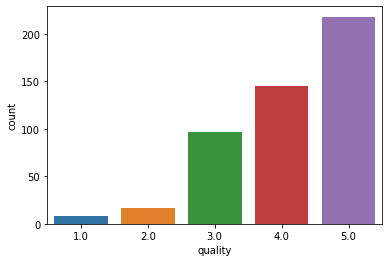

In [213]:
sns.countplot(data=df_dress_top10,x='quality')# The quality plot for dresses.

In [214]:
df_dress_top10.review_summary.value_counts()

I absolutely love this dr    102
I love this dress so much     68
I bought this dress for m     45
I wanted to love this dre     45
This dress is absolutely      43
I love love love this dre     39
Love this dress!              38
Love it!                      38
Love love love this dress     36
I really wanted to love t     31
Name: review_summary, dtype: int64

In [215]:
df_dress_top10.review_summary.value_counts().index[3]

'I wanted to love this dre'

In [216]:
df_dress_top10.review_summary.value_counts().index[9]

'I really wanted to love t'

In [217]:
negatie_review=[df_dress_top10.review_summary.value_counts().index[3],df_dress_top10.review_summary.value_counts().index[9]]

From above we can say that there aew 2 categories which seem to be negative. Those are 'I wanted to love this dre' and 'I really wanted to love t'. 

In [218]:
df_dress_top10_negative=df_dress_top10[df_dress_top10['review_summary'].isin(negatie_review)]

In [219]:
df_dress_top10_negative.quality.value_counts()

3.0    36
4.0    14
2.0    13
1.0     7
5.0     6
Name: quality, dtype: int64

Now here we can see that there are good rating even when review summary is not not positive. We will give weightage to the review summary and text because those are something which take time and effort for someone to feed that rating may be not true as it is just one touch on the screen.

In [220]:
df_dress_top10_negative # all the 76 negative reviews. 

,item_id,size,quality,cup_size,hips,bra_size,category,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
8804,161514,12,4.0,d,35.0,34.0,dresses,154.94,Kristen,slightly long,fit,803236,8.5,wide,I really wanted to love t,I really wanted to love this but it just wasn'...
9347,161592,11,3.0,d,35.0,36.0,dresses,170.18,Jodi,just right,small,157013,8.5,average,I really wanted to love t,I really wanted to love this dress for my wedd...
9496,161592,27,3.0,c,47.0,40.0,dresses,167.64,mjwedding326,very long,small,875851,8.5,average,I wanted to love this dre,I wanted to love this dress! But it was a real...
9685,161592,15,3.0,dd/e,44.0,36.0,dresses,160.02,mariamangiameli,slightly long,fit,38145,8.5,average,I really wanted to love t,I really wanted to love this dress to wear at ...
9789,161592,11,2.0,c,34.0,34.0,dresses,154.94,Gladys,just right,small,75477,6.0,average,I really wanted to love t,I really wanted to love this dress. Unfortunat...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26863,397005,15,5.0,b,45.0,38.0,dresses,170.18,idioticgenius,slightly short,small,761080,8.5,average,I wanted to love this dre,I wanted to love this dress sooo bad! But it w...
27176,397005,15,3.0,c,50.0,36.0,dresses,157.48,Jessica,slightly short,fit,332397,8.5,average,I wanted to love this dre,"I wanted to love this dress, but the collar an..."
27651,397224,21,5.0,ddd/f,50.0,38.0,dresses,162.56,shpgr1977,slightly long,fit,274176,8.5,average,I wanted to love this dre,I wanted to love this dress! I had been dream...
27735,397642,11,4.0,dd/e,40.0,34.0,dresses,170.18,meghan.fullamclarke,slightly short,large,930050,8.5,average,I wanted to love this dre,I wanted to love this dress but when I had it ...


In [221]:
sns.barplot

<function seaborn.categorical.barplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=<function mean at 0x000001B0920E7310>, ci=95, n_boot=1000, units=None, seed=None, orient=None, color=None, palette=None, saturation=0.75, errcolor='.26', errwidth=None, capsize=None, dodge=True, ax=None, **kwargs)>

# Q7

Q.7 Find out the average shoe size for the different fits of the customer. Visualize 
using any relevant plot. Explain that, Is there any significant different shoe sizes for 
different fits?

<function matplotlib.pyplot.show(close=None, block=None)>

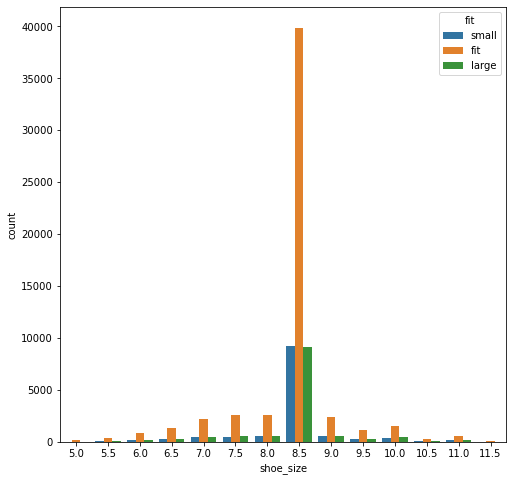

In [222]:
plt.figure(figsize=(8,8)) # count plot
sns.countplot(data=df,hue='fit',x='shoe_size')
plt.show

From the plot we can say that the all the fits are almost in same proportion for all the shoe sizes.

In [223]:
df[df['fit']=='small']['shoe_size'].mean()

8.439568569426058

In [224]:
df[df['fit']=='fit']['shoe_size'].mean()

8.374326013211926

In [225]:
df[df['fit']=='large']['shoe_size'].mean()

8.413011412157442

# Q8

Q.8 Identify the customer’s common shoe width and average size for those who 
purchased the maximum quality. Is the mode of shoe width affect the user review?
Visualize using the appropriate plot.


In [226]:
df.quality.value_counts()

5.0    29117
4.0    26862
3.0    19333
2.0     5082
1.0     1338
Name: quality, dtype: int64

In [227]:
df_max_quality=df[df['quality']==df.quality.max()]# data for maximum quality
df_max_quality.head()

,item_id,size,quality,cup_size,hips,bra_size,category,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
0,123373,7,5.0,d,38.0,34.0,new,167.64,Emily,just right,small,991571,8.5,average,NaN,NaN
3,123373,21,5.0,dd/e,35.0,34.0,new,165.10,alexmeyer626,just right,fit,875643,8.5,average,NaN,NaN
4,123373,18,5.0,b,35.0,36.0,new,157.48,dberrones1,slightly long,small,944840,8.5,average,NaN,NaN
5,123373,11,5.0,c,41.0,36.0,new,162.56,Doreenajane,just right,small,162012,8.5,average,NaN,NaN
7,123373,11,5.0,d,42.0,38.0,new,165.10,brettloie,just right,small,58869,8.5,average,NaN,NaN


In [228]:
df_max_quality.shoe_width.value_counts()

average    27111
wide        1404
narrow       602
Name: shoe_width, dtype: int64

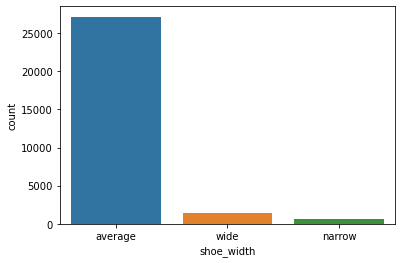

In [229]:
sns.countplot(data=df_max_quality,x='shoe_width') #plotting count plot for the column 'Shoe_width'
plt.show()

We can say that the most common shoe width is average.

In [230]:
df_max_quality.shoe_size.value_counts()

8.5     20226
8.0      1472
7.5      1391
9.0      1364
7.0      1199
10.0      865
6.5       682
9.5       621
6.0       483
11.0      348
5.5       204
10.5      137
5.0       104
11.5       21
Name: shoe_size, dtype: int64

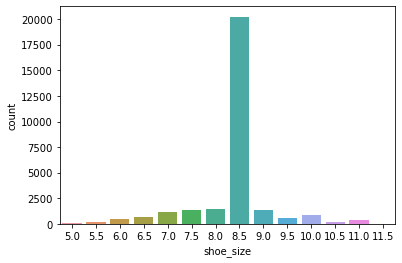

In [231]:
sns.countplot(data=df_max_quality,x='shoe_size')
plt.show()

Most people use 8.5 shoe size

In [232]:
df_max_quality.shoe_size.mean()

8.37411134388845

Therefor the average size will be 8.5 as that is the size avilable after 8

In [233]:
df.review_summary.value_counts().head(100)

Love it!                     182
I absolutely love this dr    122
I really wanted to love t     91
Love it                       90
I love this dress so much     82
                            ... 
I love the Charter School     17
I am very pleased with th     17
Beautiful                     17
I ended up returning this     17
I love this dress!            17
Name: review_summary, Length: 100, dtype: int64

In [234]:
df_review=df[df['review_summary'].isin(df.review_summary.value_counts().head(100).index)]

In [235]:
x=pd.crosstab(df_review['review_summary'],df_review['shoe_width'])
x.T

review_summary,.,:),Absolutely love this dres,After reading the reviews,Beautiful,Cute,Cute!,Great,Great!,I absolutely LOVE this dr,...,This is my first purchase,This is my new favorite s,This is one of my favorit,This skirt is absolutely,This was my first ModClot,This was my first purchas,Very cute,Very cute!,love it,love it!
shoe_width,,,,,,,,,,,,,,,,,,,,,
average,75,15,33,23,14,22,23,22,20,17,...,17,23,80,20,22,24,19,18,18,26
narrow,0,0,0,0,1,1,0,0,4,1,...,1,0,0,0,0,0,0,0,0,1
wide,0,2,0,1,2,1,3,1,0,4,...,0,0,2,1,0,2,0,0,0,0


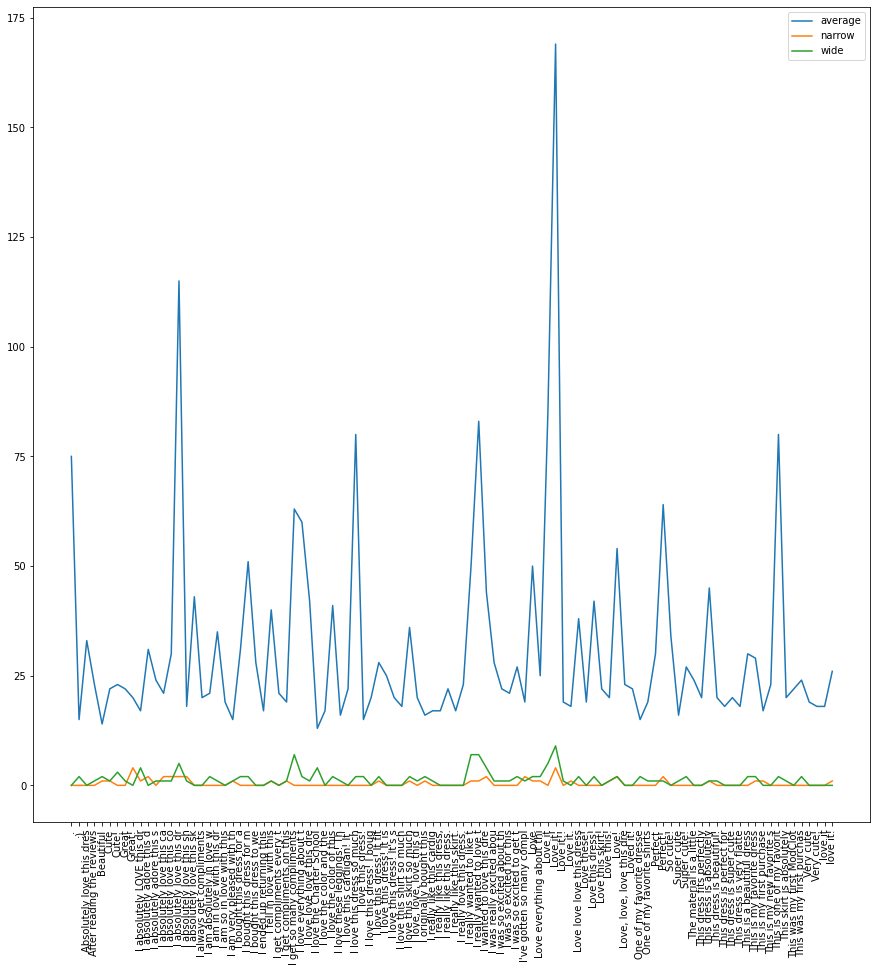

In [236]:
plt.figure(figsize=(15,15))
plt.plot(x)
plt.xticks(rotation=90)
plt.legend(x.columns)
plt.show()

As we saw before the mode of shoe width was average and from the above plot we can say that people with average shoe width obviously have more number of reviews as they are more in number.
When we look for variation in general by loooking at the diiferent lines for different shoe widths we can say that they all follow same variaion.

# Q9

Q.9 Extract the records belonging to the top 10 reviews, and then find the review 
summary for the different cup sizes. The basic analysis explains what you would try to 
infer. Try to use visualization.

In [237]:
df.review_summary.value_counts().head(10)

Love it!                     182
I absolutely love this dr    122
I really wanted to love t     91
Love it                       90
I love this dress so much     82
This is one of my favorit     82
.                             75
I get so many compliments     70
Perfect!                      67
I love everything about t     62
Name: review_summary, dtype: int64

In [238]:
top10_review_summary=df.review_summary.value_counts().head(10).index
top10_review_summary

Index(['Love it!', 'I absolutely love this dr', 'I really wanted to love t',
       'Love it', 'I love this dress so much', 'This is one of my favorit',
       '.', 'I get so many compliments', 'Perfect!',
       'I love everything about t'],
      dtype='object')

In [239]:
df_top_10_review=df[df['review_summary'].isin(top10_review_summary)]
df_top_10_review.head()

,item_id,size,quality,cup_size,hips,bra_size,category,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
6761,152702,12,4.0,dd/e,35.0,34.0,new,157.48,danazurk,just right,fit,668566,6.5,average,I love everything about t,I love everything about this dress. It's stret...
6854,152702,8,4.0,c,37.0,32.0,new,167.64,Sarah,just right,fit,850848,7.0,average,I absolutely love this dr,I absolutely love this dress! The fit is perfe...
6876,152702,8,5.0,b,35.0,36.0,new,170.18,nate7lin,slightly long,fit,105081,8.5,average,Love it,Love it
7038,152702,8,5.0,ddd/f,35.0,34.0,new,165.10,kmschultz1988,just right,fit,264238,8.5,average,I love this dress so much,"I love this dress so much, I wish I can wear i..."
7071,152702,12,2.0,d,34.0,36.0,new,154.94,bowties_and_goodbyes,slightly short,small,246114,8.5,average,I really wanted to love t,I really wanted to love this dress because it ...


In [240]:
df_top_10_review.cup_size.value_counts()

c         301
d         169
b         142
dd/e      130
ddd/f      68
a          67
dddd/g     26
h           7
aa          6
k           4
i           2
j           1
Name: cup_size, dtype: int64

In [241]:
rs_cs=pd.crosstab(df_top_10_review['review_summary'],df_top_10_review['cup_size'])
rs_cs

cup_size,a,aa,b,c,d,dd/e,ddd/f,dddd/g,h,i,j,k
review_summary,,,,,,,,,,,,
.,7,0,14,32,8,4,4,6,0,0,0,0
I absolutely love this dr,9,1,15,28,33,17,7,8,3,0,0,1
I get so many compliments,5,1,6,24,11,15,6,1,0,0,0,1
I love everything about t,1,1,12,29,5,12,1,1,0,0,0,0
I love this dress so much,6,1,11,26,13,14,6,1,1,1,1,1
I really wanted to love t,6,0,15,29,16,13,10,2,0,0,0,0
Love it,5,0,18,29,18,12,5,1,2,0,0,0
Love it!,10,0,26,64,37,21,18,3,1,1,0,1
Perfect!,7,2,12,15,12,14,4,1,0,0,0,0


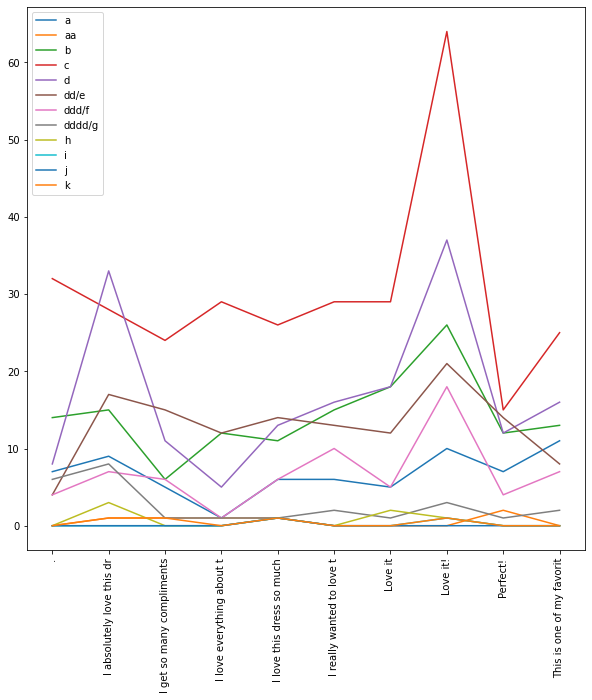

In [242]:
plt.figure(figsize=(10,10))
plt.plot(rs_cs)
plt.xticks(rotation=90)
plt.legend(rs_cs.columns,loc='upper left')
plt.show()

In [243]:
negative=rs_cs.index[[0,5]]
negative

Index(['.', 'I really wanted to love t'], dtype='object', name='review_summary')

In [244]:
positive=rs_cs.index.drop(negative)
positive

Index(['I absolutely love this dr', 'I get so many compliments',
       'I love everything about t', 'I love this dress so much', 'Love it',
       'Love it!', 'Perfect!', 'This is one of my favorit'],
      dtype='object', name='review_summary')

In [245]:
def add_PosNeg(value):
    negative=rs_cs.index[[0,5]]
    negative
    if value in negative:
        
        return 'negative'
    else:
        return 'positive'

In [246]:
df_top_10_review['P/N']=df_top_10_review.review_summary.apply(add_PosNeg)

In [247]:
df_top_10_review

,item_id,size,quality,cup_size,hips,bra_size,category,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text,P/N
6761,152702,12,4.0,dd/e,35.0,34.0,new,157.48,danazurk,just right,fit,668566,6.5,average,I love everything about t,I love everything about this dress. It's stret...,positive
6854,152702,8,4.0,c,37.0,32.0,new,167.64,Sarah,just right,fit,850848,7.0,average,I absolutely love this dr,I absolutely love this dress! The fit is perfe...,positive
6876,152702,8,5.0,b,35.0,36.0,new,170.18,nate7lin,slightly long,fit,105081,8.5,average,Love it,Love it,positive
7038,152702,8,5.0,ddd/f,35.0,34.0,new,165.10,kmschultz1988,just right,fit,264238,8.5,average,I love this dress so much,"I love this dress so much, I wish I can wear i...",positive
7071,152702,12,2.0,d,34.0,36.0,new,154.94,bowties_and_goodbyes,slightly short,small,246114,8.5,average,I really wanted to love t,I really wanted to love this dress because it ...,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82430,806856,26,5.0,ddd/f,49.0,44.0,outerwear,175.26,lfclyburn13,just right,fit,897318,8.5,average,Love it!,Love it!,positive
82483,806856,32,5.0,c,44.0,40.0,outerwear,167.64,Tegan,just right,large,316442,8.5,average,.,.,negative
82678,807252,20,4.0,d,45.0,38.0,outerwear,172.72,ajreyes138,just right,large,873885,8.5,wide,I get so many compliments,I get so many compliments on this coat! It run...,positive
82721,807384,8,5.0,c,35.0,34.0,outerwear,160.02,Lou2390,just right,fit,584980,8.5,average,Perfect!,I just received this coat in Basil today. The ...,positive


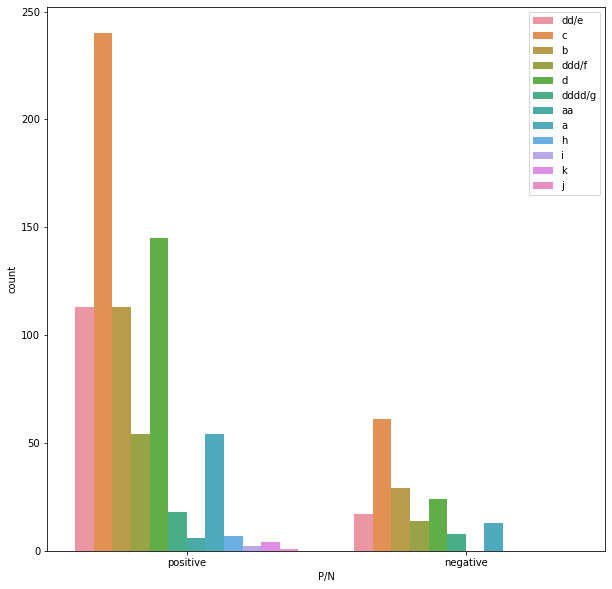

In [248]:
plt.figure(figsize=(10,10))
sns.countplot(data=df_top_10_review,x='P/N',hue='cup_size')
plt.legend(df_top_10_review.cup_size.unique(),loc='upper right')
plt.show()

We can see that there are more positive reviews for all the cup sizes, also there are almost no negative revies for j,k,i,h and aa cup sizes. This may be because they are very less in number.

Overall we can say customers are geenerally positive but yes there are considerate amount of negative reviews and hence the company need to work on that and find the reason for that.

# Q10

Q.10 Identify the most common review that we got from the customer whose hips size 
is greater than 35. Find out what kind of inference you can make.


In [249]:
most_common_review=df[df['hips']>35]['review_summary'].value_counts().head(1).index
most_common_review

Index(['Love it!'], dtype='object')

In [250]:
df_hip_35plus=df[(df['hips']>35) & (df['review_summary'].isin(most_common_review))]

In [251]:
df_hip_35plus

,item_id,size,quality,cup_size,hips,bra_size,category,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
7391,153494,26,4.0,dddd/g,43.0,38.0,new,154.94,ohnostalgia25,slightly long,fit,136054,8.0,average,Love it!,Love it!
7943,154411,12,3.0,d,40.0,34.0,new,162.56,rsmorin,slightly short,fit,642770,8.5,average,Love it!,Love it!
9124,161514,12,4.0,c,45.0,34.0,dresses,167.64,teeylsutton,just right,fit,25768,8.5,average,Love it!,Love it!
10215,162937,12,5.0,d,42.0,36.0,sale,170.18,Hannah,slightly short,fit,986352,9.0,average,Love it!,"I just got this dress yesterday, and I absolut..."
10231,163086,8,5.0,c,36.0,28.0,dresses,162.56,vitamicaelita,just right,fit,704750,8.0,wide,Love it!,Really love it. Fits perfect and looks great. ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81229,804295,8,2.0,d,40.0,32.0,outerwear,165.10,erind_123,just right,fit,723049,8.5,average,Love it!,Love it!
81550,806479,8,5.0,b,39.0,34.0,outerwear,162.56,Natalia,just right,fit,849409,7.5,average,Love it!,Love it!
81592,806479,8,3.0,b,40.0,34.0,outerwear,165.10,spklassen,just right,fit,234777,8.5,average,Love it!,Love it!
81843,806479,8,4.0,dd/e,38.0,34.0,outerwear,160.02,Alicia,slightly long,fit,795700,8.5,average,Love it!,Love it!


In [252]:
df_hip_35plus.height.median()

165.1

In [253]:
df_hip_35plus.shoe_size.value_counts()

8.5     64
8.0      5
9.0      4
7.5      4
7.0      3
9.5      1
10.0     1
10.5     1
Name: shoe_size, dtype: int64

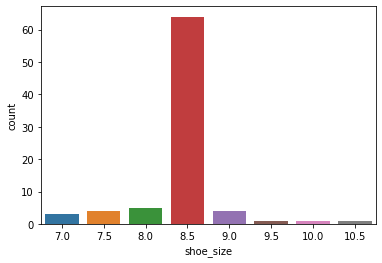

In [254]:
sns.countplot(data=df_hip_35plus,x='shoe_size')
plt.show()

In [255]:
df_hip_35plus.fit.value_counts()

fit      70
large     7
small     6
Name: fit, dtype: int64

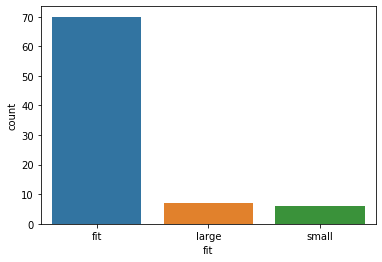

In [256]:
sns.countplot(data=df_hip_35plus,x='fit')
plt.show()

In [257]:
df_hip_35plus.shoe_width.value_counts()

average    76
wide        5
narrow      2
Name: shoe_width, dtype: int64

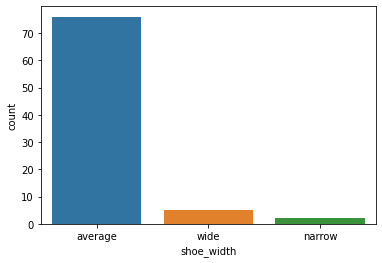

In [258]:
sns.countplot(data=df_hip_35plus,x='shoe_width')
plt.show()

In [259]:
df_hip_35plus.category.value_counts()

tops         29
new          18
dresses      16
bottoms      10
outerwear     7
sale          3
Name: category, dtype: int64

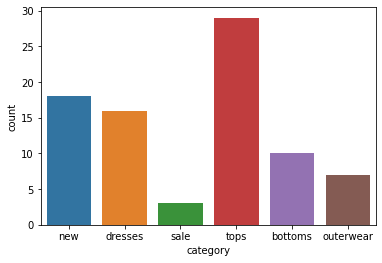

In [260]:
sns.countplot(data=df_hip_35plus,x='category')
plt.show()

In [261]:
df_hip_35plus.bra_size.value_counts()

34.0    21
36.0    20
38.0    18
32.0    11
40.0     6
42.0     4
28.0     1
30.0     1
44.0     1
Name: bra_size, dtype: int64

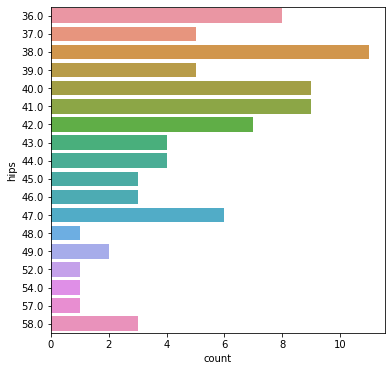

In [262]:
plt.figure(figsize=(6,6))
sns.countplot(data=df_hip_35plus,y='hips')
plt.show()

In [263]:
df_hip_35plus.cup_size.value_counts()

c         23
d         22
b         12
ddd/f     12
dd/e       9
dddd/g     2
i          1
a          1
h          1
Name: cup_size, dtype: int64

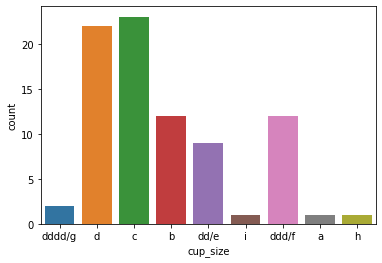

In [264]:
sns.countplot(data=df_hip_35plus,x='cup_size')
plt.show()

# Q11

Q.11 What is the relationship between height and weight? Describe what kind of 
relationship it has

Healthy BMI range==> 18.5—24.9

bmi=wt/h*h

In [265]:
def max_weight(value):
    bmi=24.9
    wt=bmi*(value**2/10000)
    return round(wt,2)

def min_weight(value):
    bmi=18.5
    wt=bmi*(value**2/10000)
    return round(wt,2)

In [266]:
df1=df.copy()
df1['max_weight']=df1.height.apply(max_weight)
df1['min_weight']=df1.height.apply(min_weight)

In [267]:
df1

,item_id,size,quality,cup_size,hips,bra_size,category,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text,max_weight,min_weight
0,123373,7,5.0,d,38.0,34.0,new,167.64,Emily,just right,small,991571,8.5,average,NaN,NaN,69.98,51.99
1,123373,13,3.0,b,30.0,36.0,new,157.48,sydneybraden2001,just right,small,587883,8.5,average,NaN,NaN,61.75,45.88
2,123373,7,2.0,b,35.0,32.0,new,170.18,Ugggh,slightly long,small,395665,9.0,average,NaN,NaN,72.11,53.58
3,123373,21,5.0,dd/e,35.0,34.0,new,165.10,alexmeyer626,just right,fit,875643,8.5,average,NaN,NaN,67.87,50.43
4,123373,18,5.0,b,35.0,36.0,new,157.48,dberrones1,slightly long,small,944840,8.5,average,NaN,NaN,61.75,45.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82785,807722,8,4.0,b,35.0,36.0,outerwear,172.72,Jennifer,just right,fit,727820,8.5,average,Cute jacket!,Cute jacket!,74.28,55.19
82786,807722,12,5.0,ddd/f,35.0,34.0,outerwear,165.10,Kelli,slightly long,small,197040,8.5,average,It's a beautiful jacket.,It's a beautiful jacket. I love how it's knit ...,67.87,50.43
82787,807722,12,5.0,dddd/g,36.0,32.0,outerwear,162.56,elacount,just right,fit,102493,8.5,average,I love this blazer. It is,I love this blazer. It is a great office piece...,65.80,48.89
82788,807722,12,4.0,c,35.0,34.0,outerwear,160.02,jennaklinner,just right,fit,756491,8.5,average,I love this blazer!! I wo,I love this blazer!! I wore it yesterday and g...,63.76,47.37


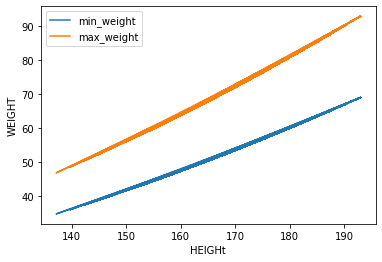

In [268]:
plt.plot(df1['height'],df1['min_weight'])
plt.plot(df1['height'],df1['max_weight'])
plt.xlabel('HEIGHt')
plt.ylabel('WEIGHT')
plt.legend(['min_weight','max_weight'])
plt.show()

Now since we knew the height for the customers using the healthy bmi range we can find the maximum and minimum weight they shoud have.

here ,it signifies the positive correlation as height is incresing weight is also increasing.

# Q12

Q.12 Plot the pair plot for the numerical plot. Explain according to your problem 
statement how the pair plot would help you.


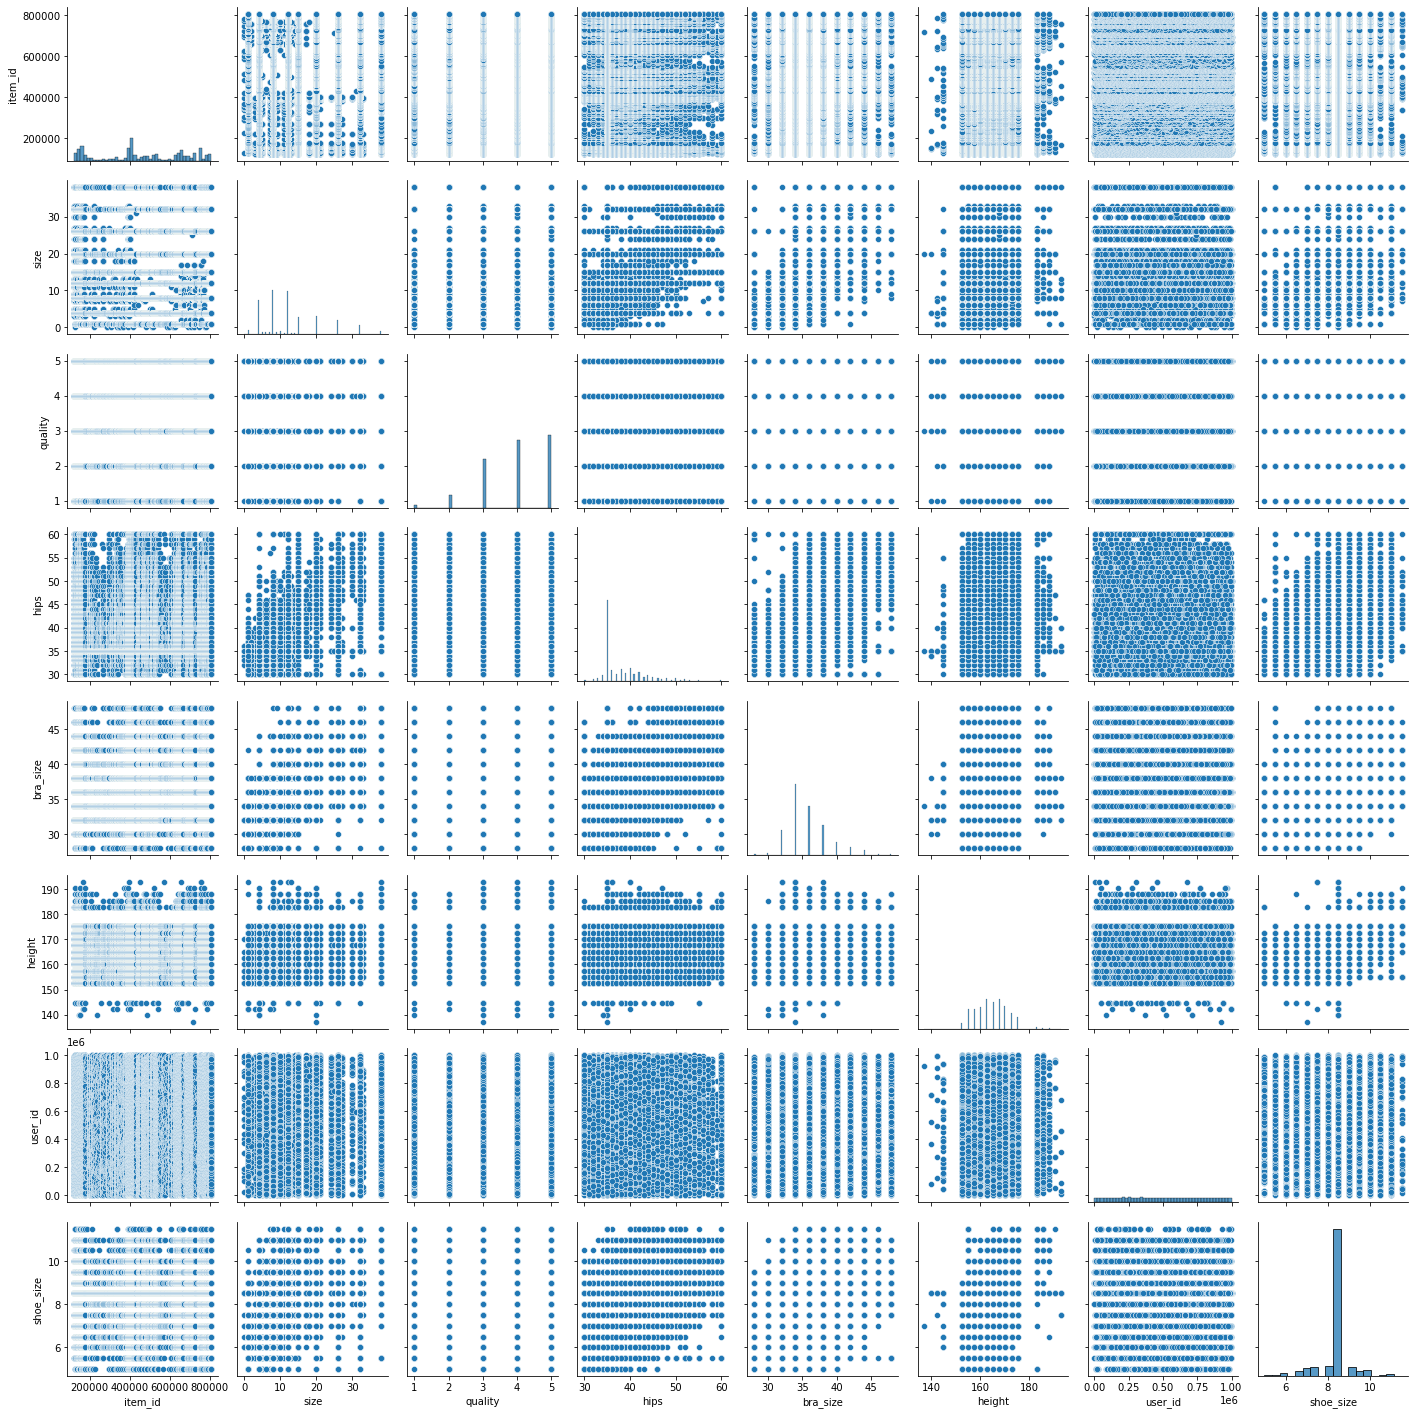

In [269]:
sns.pairplot(df,palette='inferno') #
plt.show()

here the pairplot creates a matrix of scatter plots for all pairs of variables in a given dataset. Each scatter plot in the matrix shows the relationship between two variables. The diagonal of the matrix is filled with histograms or kernel density estimates, which show the distribution of each variable.

# Statistical Analysis

# 1.

Q.1 Test the claim that the category feature and review summary have any 
relationship among them. The level of significance is 5%.

H0: no relation
    
H1: There is relation

alpha=0.05

We will perform test of association that is Chisquare test.

In [270]:
d=df[['category','review_summary']]

In [276]:
table=pd.crosstab(df_top_10_review['category'],df_top_10_review['review_summary'])
table

review_summary,.,I absolutely love this dr,I get so many compliments,I love everything about t,I love this dress so much,I really wanted to love t,Love it,Love it!,Perfect!,This is one of my favorit
category,,,,,,,,,,
bottoms,24,0,8,9,0,21,7,19,14,8
dresses,9,102,29,18,68,31,25,38,12,26
new,20,9,11,16,5,22,22,45,14,17
outerwear,6,0,7,4,0,4,4,14,2,1
sale,0,10,0,4,8,1,8,7,5,0
tops,16,0,15,10,0,11,24,59,20,30
wedding,0,1,0,1,1,1,0,0,0,0


In [277]:
st.chi2_contingency(table)

(368.5063312130476,
 2.191064560751538e-48,
 54,
 array([[ 8.93824485, 14.53954496,  8.34236186,  7.38894908,  9.77248104,
         10.84507042, 10.72589382, 21.69014085,  7.98483207,  9.77248104],
        [29.08992416, 47.31960997, 27.15059588, 24.04767064, 31.80498375,
         35.29577465, 34.90790899, 70.5915493 , 25.98699892, 31.80498375],
        [14.70747562, 23.92416035, 13.72697725, 12.15817985, 16.08017335,
         17.84507042, 17.64897075, 35.69014085, 13.13867822, 16.08017335],
        [ 3.4127844 ,  5.55146262,  3.18526544,  2.8212351 ,  3.73131094,
          4.14084507,  4.09534128,  8.28169014,  3.04875406,  3.73131094],
        [ 3.49404117,  5.6836403 ,  3.26110509,  2.88840737,  3.82015168,
          4.23943662,  4.1928494 ,  8.47887324,  3.12134345,  3.82015168],
        [15.03250271, 24.45287107, 14.03033586, 12.42686891, 16.43553629,
         18.23943662, 18.03900325, 36.47887324, 13.42903575, 16.43553629],
        [ 0.32502709,  0.52871073,  0.30335861,  0.268689

In [278]:
table1=pd.crosstab(df['category'],df['review_summary'])
table1

review_summary,!,!!!,!!!!,#4 for me! I'm collecting,#FashionDeux Absolutely,#FashionDeux This is the,#FashionDeux I have been,#FashionDeux This skirt i,#Review ContestAlthough t,#ReviewContest,...,you have it in other colo,you know who this dress d,you may see similar cardi,you need every color,you should buy every colo,you shouldn't have to spe,yup.,yup. This coat is amazing,"zipper stuck a little, bu",zipper very difficult to
category,,,,,,,,,,,,,,,,,,,,,
bottoms,1,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
dresses,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
new,0,0,0,0,0,1,0,0,1,1,...,0,0,0,0,1,0,0,0,1,0
outerwear,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
sale,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tops,1,1,0,1,0,0,0,0,0,0,...,1,0,1,1,0,0,1,0,0,0
wedding,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [279]:
st.chi2_contingency(table1)

(386388.9459798166,
 1.5946348835889337e-119,
 366162,
 array([[0.40144333, 0.20072167, 0.20072167, ..., 0.20072167, 0.20072167,
         0.20072167],
        [0.48820303, 0.24410151, 0.24410151, ..., 0.24410151, 0.24410151,
         0.24410151],
        [0.38836813, 0.19418406, 0.19418406, ..., 0.19418406, 0.19418406,
         0.19418406],
        ...,
        [0.06649446, 0.03324723, 0.03324723, ..., 0.03324723, 0.03324723,
         0.03324723],
        [0.53685556, 0.26842778, 0.26842778, ..., 0.26842778, 0.26842778,
         0.26842778],
        [0.00732318, 0.00366159, 0.00366159, ..., 0.00366159, 0.00366159,
         0.00366159]]))

here we performed the test of association for top 10 review summary and then for all the review summary. In both we can see that the p-value<0.05 which means we have to reject null hypothesis.

This means they are related and this can also be seen in table that somecategories have much more reviews and some have very less reviews. Hence the categories and review summary are associated.

# 2.

Q.2 Test statistically whether the size and hips have any relationship using 0.05 alpha. Before the above test, Test the normality test.

In [280]:
df['size'].value_counts().sort_index()

0        28
1      1692
2        90
3       140
4     13554
5       830
6       763
7       772
8     17711
9       723
10     1159
11      533
12    17165
13      478
14      360
15     6831
17      234
18      249
20     7230
21      201
24      124
25        1
26     5613
27       94
30       65
31        1
32     3592
33       45
38     1454
Name: size, dtype: int64

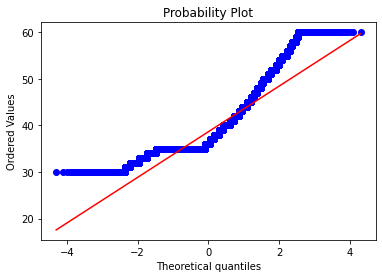

In [283]:
import pylab
st.probplot(df['hips'], dist="norm", plot=pylab)
pylab.show()

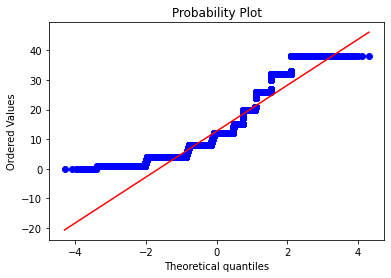

In [284]:
st.probplot(df['size'], dist="norm", plot=pylab)
pylab.show()

Here we would like to mention that since hips and size are discrete values they can not follow normal distribution. Even if we consider that they do follow normal distribution and try to check for normality we can see from above plots that they are not normally distributed. If an attribute would have followed normal distribution, the blue dots must have alligned with the red line. 
These plots are QQ plots which are used to check normality.

Whenever an attribute do not follow a normal distribution we have several transformation techniques to convert it into normal distribution.One such technique is Central Limit Theorem.

In [285]:
df.shape

(81732, 16)

In [286]:
N=81732

alpha=0.05
Z_Score = 1.96
sampl_size=int((((Z_Score)**2)*(0.5**2))/(0.05**2))
sampl_size

384

<AxesSubplot:ylabel='Count'>

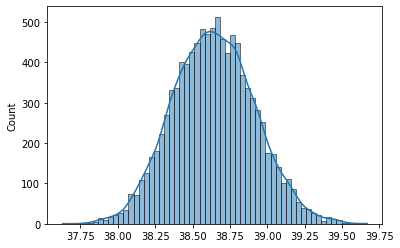

In [288]:
l=[]#doesen't make sense as normal distribution is only for continuous distribution and not dicrete
for i in range(10000):
    x=df['hips'].sample(sampl_size)
    
    l.append(x.mean())
sns.histplot(l,kde=True)

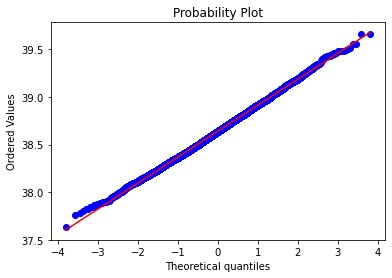

In [289]:
st.probplot(l, dist="norm", plot=pylab)
pylab.show()

Now here we can say that the data is normally distributed after applying central limit theorem.

In [290]:
df.corr()

,size,quality,hips,bra_size,height,shoe_size
size,1.000000,-0.023469,0.510488,0.740943,0.140483,0.252344
quality,-0.023469,1.000000,-0.013118,-0.017949,-0.018685,-0.018823
hips,0.510488,-0.013118,1.000000,0.470985,0.104073,0.167826
bra_size,0.740943,-0.017949,0.470985,1.000000,0.106486,0.230455
height,0.140483,-0.018685,0.104073,0.106486,1.000000,0.262242
shoe_size,0.252344,-0.018823,0.167826,0.230455,0.262242,1.000000


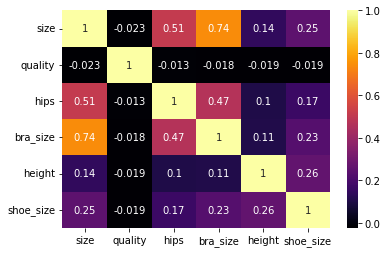

In [292]:
sns.heatmap(df.corr(),annot=True,cmap='inferno')
plt.show()

From here we can see that there is a positive linear relation between size and hips of 0.51. This means as the hips increases the size increases

<AxesSubplot:xlabel='hips', ylabel='size'>

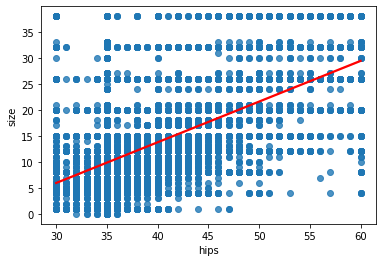

In [294]:
sns.regplot(data=df,x='hips',y='size',line_kws={"color": "red"})

The red line shows that as size increase hip size also increase.

# 3.

Q.3 Does the quality significantly differ for any one shoe width? Test the test with 96%confidence intervals.

Here again we will go for test of association.

H0: They are not associated
    
H1:They are associated

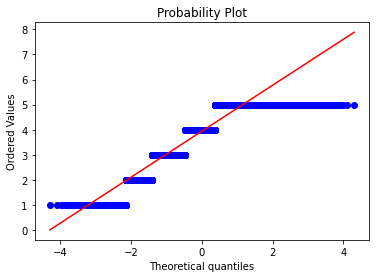

In [301]:
st.probplot(df['quality'], dist="norm", plot=pylab)
pylab.show()

 since quality has discrete values they can not follow normal distribution. 

In [296]:
df.shoe_width.value_counts()

average    76296
wide        3893
narrow      1543
Name: shoe_width, dtype: int64

In [297]:
df.quality.value_counts()

5.0    29117
4.0    26862
3.0    19333
2.0     5082
1.0     1338
Name: quality, dtype: int64

In [299]:
table2=pd.crosstab(index=df['quality'],columns=df['shoe_width'])
table2

shoe_width,average,narrow,wide
quality,,,
1.0,1241,26,71
2.0,4753,89,240
3.0,18059,345,929
4.0,25132,481,1249
5.0,27111,602,1404


In [300]:
st.chi2_contingency(table2)

(10.177999886856123,
 0.2527543208396612,
 8,
 array([[1.24900954e+03, 2.52598003e+01, 6.37306563e+01],
        [4.74399589e+03, 9.59419322e+01, 2.42062179e+02],
        [1.80471611e+04, 3.64983348e+02, 9.20855589e+02],
        [2.50754068e+04, 5.07121641e+02, 1.27947152e+03],
        [2.71804267e+04, 5.49693278e+02, 1.38688006e+03]]))

In [304]:
p_value=st.chi2_contingency(table2)[1]
p_value

0.2527543208396612

Now if confidemnce interval = 96%

Then alpha will be 0.04

Here p-value> alpha==> we fail to reject null hypothesis.

Hence there is no relation between quality and shoe_width

# 4. 

Q. 4. Check if the shoe width feature affects the review summary with a 99% 
confidence interval.


H0: They are not associated
    
H1: They are associated 
    
CI=99%

alpha=0.01

In [306]:
df['shoe_width'].value_counts()

average    76296
wide        3893
narrow      1543
Name: shoe_width, dtype: int64

In [310]:
df.review_summary.value_counts()

Love it!                     182
I absolutely love this dr    122
I really wanted to love t     91
Love it                       90
I love this dress so much     82
                            ... 
The only reason I took th      1
Love this I want more col      1
The material of the jacke      1
new favorite jacket!           1
I love this piece. I'm re      1
Name: review_summary, Length: 61028, dtype: int64

In [269]:
table3=pd.crosstab(columns=df['shoe_width'],index=df['review_summary'])
table3

shoe_width,average,narrow,wide
review_summary,,,
!,2,0,0
!!!,1,0,0
!!!!,1,0,0
#4 for me! I'm collecting,1,0,0
#FashionDeux Absolutely,1,0,0
...,...,...,...
you shouldn't have to spe,1,0,0
yup.,1,0,0
yup. This coat is amazing,1,0,0


In [270]:
#alpha= 0.01
st.chi2_contingency(table3)

(126562.77974627003,
 9.659022885471671e-20,
 122054,
 array([[1.86570622, 0.0383202 , 0.09597358],
        [0.93285311, 0.0191601 , 0.04798679],
        [0.93285311, 0.0191601 , 0.04798679],
        ...,
        [0.93285311, 0.0191601 , 0.04798679],
        [0.93285311, 0.0191601 , 0.04798679],
        [0.93285311, 0.0191601 , 0.04798679]]))

In [271]:
p_value=st.chi2_contingency(table3)[1]
p_value

9.659022885471671e-20

In [272]:
p_value<0.01

True

We can reject null hypothesis and hence the attributes, shoe width and review summary are dependent. 

We can also see this in our earlier analysis when we found that most number of shoe_width is average and hence the reviews for this category is far more than for others. Therefore when we will talk about different types of shoe widths we will be already knowing that average has most numbers and hence variety of reviews and similary for other categories.

# 5.

Q.5 Check if the length feature affects the review summary with a 95% confidence interval.

Here again we will go for test of association.

H0: They are not associated

H1:They are associated

CI=95%

alpha=0.05

In [273]:
df.length.value_counts()

just right        61241
slightly long     11045
slightly short     6282
very long          2362
very short          802
Name: length, dtype: int64

In [274]:
df.review_summary.value_counts()

Love it!                     182
I absolutely love this dr    122
I really wanted to love t     91
Love it                       90
I love this dress so much     82
                            ... 
The only reason I took th      1
Love this I want more col      1
The material of the jacke      1
new favorite jacket!           1
I love this piece. I'm re      1
Name: review_summary, Length: 61028, dtype: int64

In [320]:
table4=pd.crosstab(df['review_summary'],df['length'])
table4

length,just right,slightly long,slightly short,very long,very short
review_summary,,,,,
!,1,1,0,0,0
!!!,1,0,0,0,0
!!!!,1,0,0,0,0
#4 for me! I'm collecting,1,0,0,0,0
#FashionDeux Absolutely,1,0,0,0,0
...,...,...,...,...,...
you shouldn't have to spe,1,0,0,0,0
yup.,1,0,0,0,0
yup. This coat is amazing,1,0,0,0,0


In [321]:
st.chi2_contingency(table4)

(259555.84183393634,
 2.4618443116229004e-104,
 244108,
 array([[1.49017363, 0.27950575, 0.15067107, 0.0602631 , 0.01938645],
        [0.74508681, 0.13975288, 0.07533553, 0.03013155, 0.00969323],
        [0.74508681, 0.13975288, 0.07533553, 0.03013155, 0.00969323],
        ...,
        [0.74508681, 0.13975288, 0.07533553, 0.03013155, 0.00969323],
        [0.74508681, 0.13975288, 0.07533553, 0.03013155, 0.00969323],
        [0.74508681, 0.13975288, 0.07533553, 0.03013155, 0.00969323]]))

In [322]:
p_value=st.chi2_contingency(table4)[1]
p_value

2.4618443116229004e-104

In [324]:
#alpha=0.05
p_value<0.05 

True

We can reject null hypothesis and hence the attributes, length and review summary are dependent. 

In [327]:
pd.crosstab(df_top_10_review['review_summary'],df['length'])

length,just right,slightly long,slightly short,very long,very short
review_summary,,,,,
.,56,11,6,1,1
I absolutely love this dr,104,5,10,1,2
I get so many compliments,63,1,4,2,0
I love everything about t,50,9,2,1,0
I love this dress so much,69,7,5,1,0
I really wanted to love t,47,14,16,10,4
Love it,79,8,2,1,0
Love it!,155,15,11,0,1
Perfect!,62,3,1,1,0


We can see from above which is plot for top 10 reviews and length types. Hence we can say that definitely length types have a decreasing relation for counts of a particular review summary. 

length just right have most number of reviews for both positive and negative.

In [329]:
df_top_10_review.review_summary.unique()

array(['I love everything about t', 'I absolutely love this dr',
       'Love it', 'I love this dress so much',
       'I really wanted to love t', 'Love it!',
       'This is one of my favorit', '.', 'Perfect!',
       'I get so many compliments'], dtype=object)

In [380]:
#cross_tab for top 10 review summary and  length

In [330]:
length_review=pd.crosstab(df1[df1['review_summary'].isin(df_top_10_review.review_summary.unique())]['review_summary'],df['length'])

In [331]:
length_review

length,just right,slightly long,slightly short,very long,very short
review_summary,,,,,
.,56,11,6,1,1
I absolutely love this dr,104,5,10,1,2
I get so many compliments,63,1,4,2,0
I love everything about t,50,9,2,1,0
I love this dress so much,69,7,5,1,0
I really wanted to love t,47,14,16,10,4
Love it,79,8,2,1,0
Love it!,155,15,11,0,1
Perfect!,62,3,1,1,0


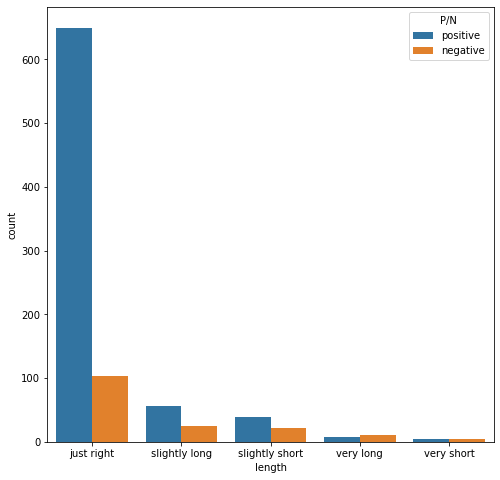

In [378]:
plt.figure(figsize=(8,8))
sns.countplot(data=df_top_10_review,x='length',hue='P/N')
plt.show()

Here also we can see that as the length changes the counts in both positive and negative reviews also changes. Hence supporting the result of our hypothesis testing.

# 6. 

Q.6 Does the average quality significantly differ for the different fits? Kindly test the relevant hypothesis test by having 0.05 alpha.
Check the normality of the data before the above test. Alpha = .05

Here we will use One-way Anova test.

H0: average quality for all fits is same
    
H1: average quality for all fits is not same
    
alpha=0.05

In [347]:
df.quality.value_counts()

5.0    29117
4.0    26862
3.0    19333
2.0     5082
1.0     1338
Name: quality, dtype: int64

In [348]:
df.fit.value_counts()

fit      56010
large    12881
small    12841
Name: fit, dtype: int64

In [359]:
st.f_oneway(df[df['fit']=='fit']['quality'],df[df['fit']=='large']['quality'],df[df['fit']=='small']['quality'])

F_onewayResult(statistic=2121.8545051857463, pvalue=0.0)

In [360]:
p_value=st.f_oneway(df[df['fit']=='fit']['quality'],df[df['fit']=='large']['quality'],df[df['fit']=='small']['quality'])[1]
p_value

0.0

In [361]:
p_value<0.05

True

We can reject null hypothesis and hence the attributes, average quality is different for different fits.

In [365]:
df[df['fit']=='fit']['quality'].mean()

4.080646313158365

In [366]:
df[df['fit']=='large']['quality'].mean()

3.8254793882462543

In [367]:
df[df['fit']=='small']['quality'].mean()

3.481115177945643

Hence from here also we can see that for all the categories we have different values and especially for small and fit the difference is considerable.

We have also plot the quality for different fits below which support the result of our hypothesis testing.

<AxesSubplot:xlabel='quality', ylabel='count'>

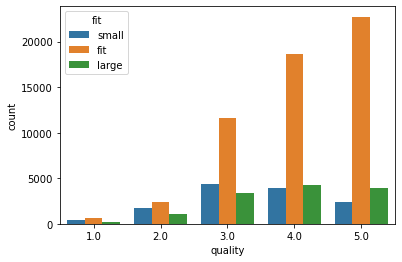

In [381]:
sns.countplot(data=df,x='quality',hue='fit')

Here again we can see that the the quality distribution is different for different fits. 